This is a simple notebook to get started in this dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
crime = pd.read_csv('londoncrime.csv')

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.4


In [5]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [7]:
crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [8]:
crime.shape

(13490604, 7)

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [11]:
crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


# Area Plot

In [12]:
crime2=crime.groupby('year', as_index=True).agg({"value":"sum"})

In [13]:
crime2

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Text(0.5, 0, 'Years')

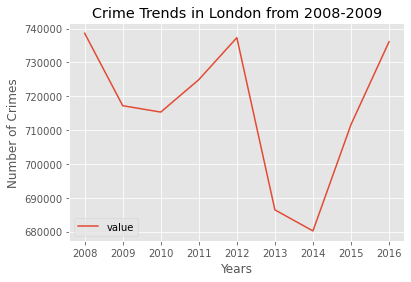

In [14]:
crime2.plot()

plt.title('Crime Trends in London from 2008-2009')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')


In [15]:
crime3=crime.groupby('borough', as_index=False).agg({"value":"sum"}).sort_values(by=["value"], ascending=[True])

In [16]:
crime3

,borough,value
6,City of London,780
20,Kingston upon Thames,89306
26,Richmond upon Thames,96771
28,Sutton,100987
2,Bexley,114136
23,Merton,115654
14,Harrow,116848
15,Havering,138947
0,Barking and Dagenham,149447
19,Kensington and Chelsea,171981


Text(0.5, 0, 'Number of Crimes')

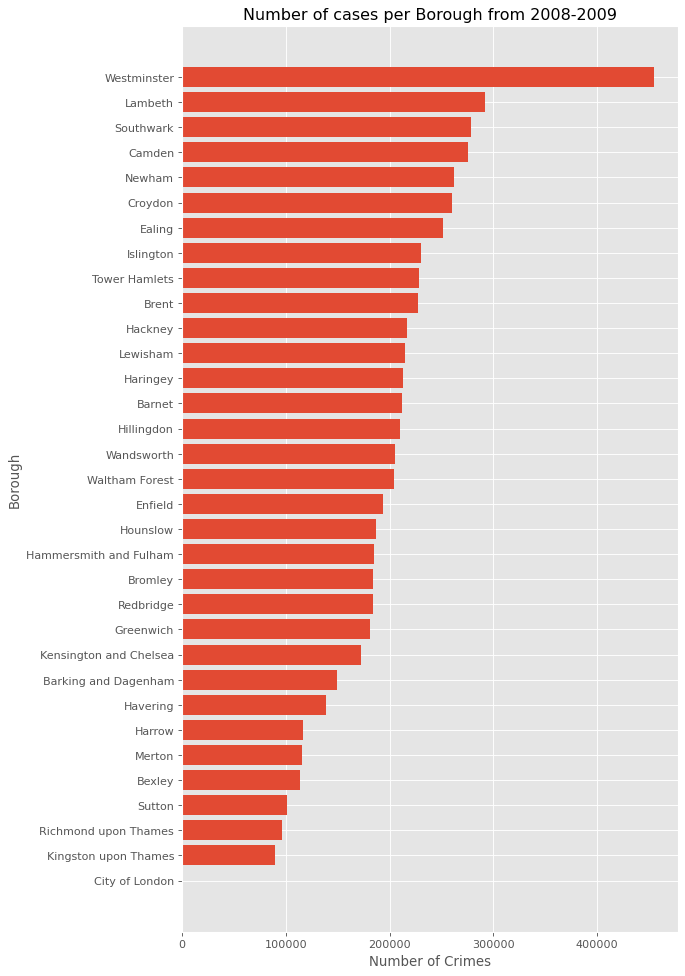

In [17]:
from matplotlib.pyplot import figure
figure(figsize= (8, 15), dpi=80)
plt.barh(crime3['borough'], crime3['value'])

plt.title('Number of cases per Borough from 2008-2009')
plt.ylabel('Borough')
plt.xlabel('Number of Crimes')

In [18]:
crime4 = pd.pivot_table(crime, values='value', index=['borough'],columns=['year'], aggfunc=np.sum)

In [19]:
crime4['Total']=crime4.sum(axis=1) #add total
crime4

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


In [43]:
crime4.sort_values(by='Total', ascending=False, axis=0, inplace=True)
crime5 = crime4.head(5) 
crime5

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [44]:
crime5.drop('Total', axis=1, inplace=True) #drop Total
crime5

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


In [45]:
crime5=crime5.transpose() #transpose
crime5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


In [46]:
crime5.index=crime5.index.map(int)

Text(0.5, 1.0, 'Top 5 Areas With The Most Crime')

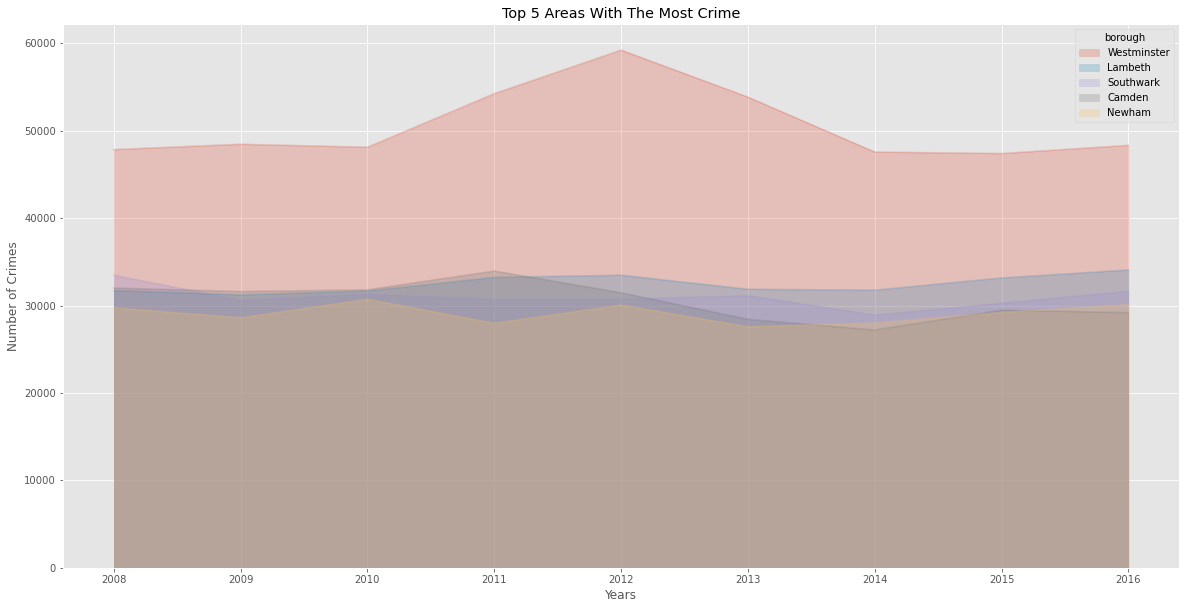

In [47]:
crime5.plot(kind='area',
         alpha=0.25,
         stacked=False,
         figsize=(20,10))
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.title('Top 5 Areas With The Most Crime')

# Histogram

In [27]:
crime4[2016].head()

borough
Westminster    48330
Lambeth        34071
Southwark      31636
Camden         29183
Newham         30090
Name: 2016, dtype: int64

In [28]:
count, bin_edges=np.histogram(crime4[2016])
print(count)
print(bin_edges)

[ 1  0  6  2 10  8  4  1  0  1]
[  178.   4993.2  9808.4 14623.6 19438.8 24254.  29069.2 33884.4 38699.6
 43514.8 48330. ]


Text(0.5, 1.0, 'Histogram')

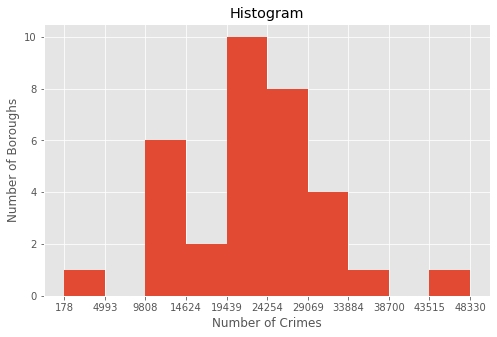

In [29]:
crime4[2016].plot(kind='hist',figsize=(8,5), xticks=bin_edges)
plt.ylabel('Number of Boroughs')
plt.xlabel('Number of Crimes')
plt.title('Histogram')

# Pie Chart

In [30]:
crime5=crime.groupby('major_category', as_index=True).agg({"value":"sum"}).sort_values(by=['value'],ascending=[False])

(-1.1231601551367114,
 1.1088943210782847,
 -1.1330414213370075,
 1.1015734010179887)

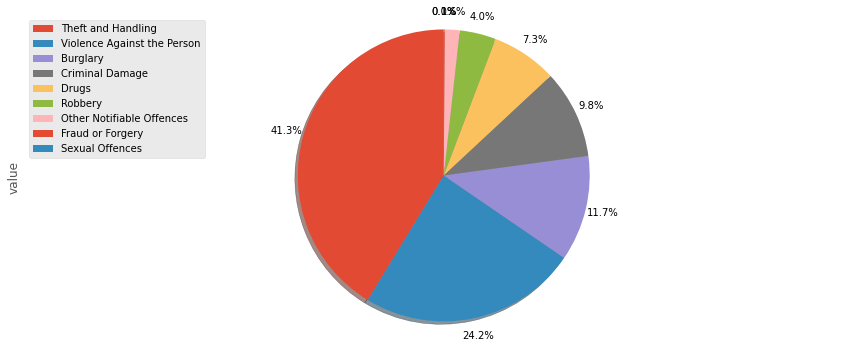

In [31]:
crime5.plot.pie(y='value', 
                    figsize=(15,6),
                   autopct='%1.1f%%',
                   startangle=90,
                   shadow=True,
                   labels=None,
                   pctdistance=1.12)
plt.legend(labels=crime5.index, loc='upper left')
plt.axis('equal')

# Box Plot 

In [32]:
crime6 = crime4.loc[['Westminster']].transpose()
crime6 = crime6.drop(['Total'])

<AxesSubplot:>

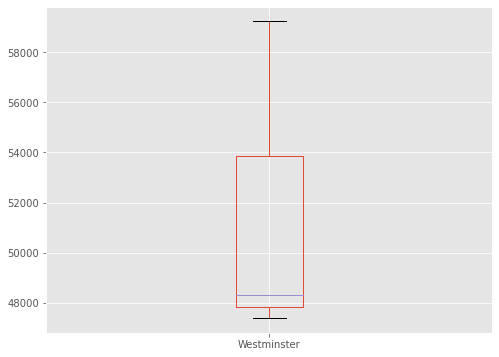

In [33]:
crime6.plot(kind='box', figsize=(8,6))

# Scatter Plot

In [34]:
crime7= pd.DataFrame(crime4.sum(axis=0))
crime7

,0
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [35]:
crime7=crime7.drop(['Total'])
crime7

,0
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [36]:
crime7=crime7.rename(columns={0:'Total'})
crime7

,Total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [37]:
crime7.reset_index(inplace=True)

In [38]:
crime7

,year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Text(0, 0.5, 'Total Crimes')

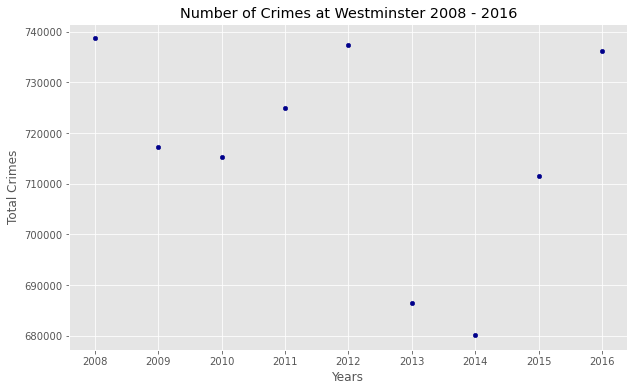

In [84]:
crime7.plot(kind='scatter',
        x='year',
        y='Total',
        figsize=(10,6),
        color='darkblue')

plt.title('Number of Crimes at Westminster 2008 - 2016')
plt.xlabel('Years')
plt.ylabel('Total Crimes')

# World Map (Folium)

In [48]:
import folium

In [73]:
!pip install geojson
import geojson as gj

In [75]:
world_map = folium.Map(location=[51.507822097714055, -0.12786449729312158], zoom_start=13, tiles='Stamen Terrain')
world_map

In [85]:
london_geo = r'london_borough.geojson'
world_map = folium.Map(location=[51.507822097714055, -0.12786449729312158], zoom_start=9)
folium.Choropleth(geo_data=london_geo,
                 data=crime4,
                 columns=[crime4.index, 'Total'],
                 key_on='feature.properties.name',
                 fill_color='YlOrRd',
                 fill_opacity=0.7,
                 line_opacity=0.2,
                 legend_name='Crimes in London').add_to(world_map)
world_map

In [76]:
from wordcloud import WordCloud, STOPWORDS

In [77]:
london_crime = open('londoncrime.txt', 'r').read()

In [78]:
stopwords = set(STOPWORDS)

In [83]:
london_wc = WordCloud(
    background_color='white',
    max_words=2500,
    stopwords=stopwords
)

#generate the word cloud
london_wc.generate(london_crime)

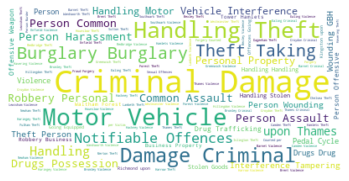

In [86]:
plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

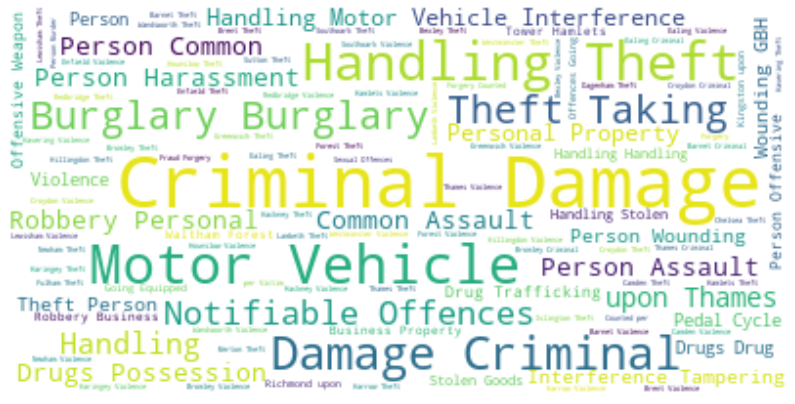

In [89]:
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18)

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Finish